In [3]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt 
import tensorflow_probability as tfp
import pandas as pd

In [4]:
train_path = './Dataset/train'
test_path = './Dataset/test'
test_imgs = os.listdir(test_path)

In [5]:
def make_train_data(train_path):
    
    x_train = []
    y_train = []
    
    train_dirs = os.listdir(train_path)
    
    temp = 0
    for dirs in train_dirs:
        cat_imgs = []
        img_path = train_path +'/' + dirs +'/'
        img_list = os.listdir(img_path)
        for img_name in img_list :
            img = cv2.imread(img_path +img_name, 0 )
            img = cv2.resize(img, (32, 32))
            cat_imgs.append(img)
            y_train.append([int(dirs[-1]) -1])
        x_train.append(cat_imgs)
        
    x_train = np.concatenate((x_train[0], x_train[1], x_train[2], x_train[3]))
    # y_train = np.concatenate((y_train[0], y_train[1], y_train[2], y_train[3]))
    
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[1], 1))
    y_train = tf.keras.utils.to_categorical(y_train, num_classes= 4)
    
    return x_train/255.0, np.array(y_train)


In [6]:
x_train, y_train = make_train_data(train_path)

In [7]:
y_train.shape

(440, 4)

array([0., 0., 0., 1.], dtype=float32)

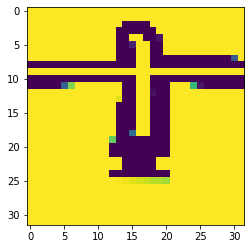

In [8]:
plt.imshow(x_train[2])
y_train[2]

In [9]:
def make_test_data(test_path):
    
    x_test = []
    y_test = []
    
    img_list = os.listdir(test_path)
    
    for img_name in img_list:
        img = cv2.imread(test_path + '/' + img_name, 0)
        img = cv2.resize(img, (32, 32))        
        x_test.append(img)
        y_test.append(int(img_name[-5] ) - 1)
        
    x_test = np.reshape(x_test, (np.shape(x_test)[0],np.shape(x_test)[1],np.shape(x_test)[2], 1))
    
    y_test = tf.keras.utils.to_categorical(y_test, num_classes= 4)

        
    return np.array(x_test)/255.0, np.array(y_test)
    

In [10]:
x_test, y_test = make_test_data(test_path)

array([0., 0., 0., 1.], dtype=float32)

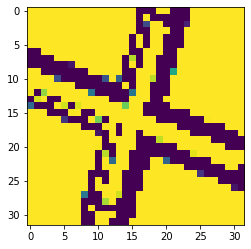

In [11]:
plt.imshow(x_test[0])
y_test[0]

In [12]:
print(f'x_train shape - {x_train.shape} x_test shape - {x_test.shape} y_train shape - {y_train.shape} y_test shape - {y_test.shape}')

x_train shape - (440, 32, 32, 1) x_test shape - (30, 32, 32, 1) y_train shape - (440, 4) y_test shape - (30, 4)


In [13]:
def Probit_regression():
    layer1 = tf.keras.layers.Flatten(input_shape = (32, 32,1))
    layer2 = tf.keras.layers.Dense(units = 4, activation = tfp.bijectors.NormalCDF())
    model = tf.keras.models.Sequential([layer1, layer2])
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics  = ['accuracy'] )
    return model

model  = Probit_regression()

In [14]:
# model.fit(x_train, y_train, epochs  = 50, validation_data = (x_test, y_test), callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights =1))

## CrossValidation Implementation

In [15]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in kfolds.split(x_train):
    X_train = x_train[train_index]
    Y_train = y_train[train_index]
    X_test = x_train[test_index]
    Y_test = y_train[test_index]
    model.fit(X_train, Y_train, epochs  = 50, validation_data = (X_test, Y_test), callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights =1))
    

Epoch 1/50
11/11 [==============================] - 1s 14ms/step - loss: 1.4363 - accuracy: 0.3409 - val_loss: 1.3505 - val_accuracy: 0.3295
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 1.2577 - accuracy: 0.3835 - val_loss: 1.1909 - val_accuracy: 0.3182
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 1.1320 - accuracy: 0.4148 - val_loss: 1.1334 - val_accuracy: 0.5341
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.8800 - accuracy: 0.6193 - val_loss: 0.8816 - val_accuracy: 0.6818
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.7074 - val_loss: 1.1512 - val_accuracy: 0.5909
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7154 - accuracy: 0.7415 - val_loss: 0.8343 - val_accuracy: 0.6705
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.8068 - val_loss: 0.7792 - val_accuracy: 0.7273
Epoch 8/50
11/11 [=

In [16]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 0.2607 - accuracy: 0.9333


[0.2606911063194275, 0.9333333373069763]